<b>Import liabraries and load datasets</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Age _Fossil.csv')
data

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0.049660,0.601750,0.762490,222.54,Jurassic,Reversed polarity,True,2.247495,Sandstone,Bottom,91.69,415.13,26606
4394,0.360085,0.215033,1.002406,276.70,Cretaceous,Reversed polarity,True,1.004584,Conglomerate,Bottom,68.97,121.10,44850
4395,0.464864,0.553313,0.659639,76.77,Devonian,Normal polarity,True,0.721947,Conglomerate,Middle,11.37,288.73,32186
4396,0.803338,0.272392,0.123562,204.82,Neogene,Reversed polarity,True,1.496427,Sandstone,Bottom,132.34,518.31,59888


<b>Exploratory Data Analysis</b>

In [3]:
data.shape

(4398, 13)

In [4]:
data_info = pd.DataFrame(data.dtypes, columns=['Tipe'])
data_info['null'] = data.isnull().sum()
data_info['unik'] = data.nunique()

data_info

,Tipe,null,unik
uranium_lead_ratio,float64,0,4398
carbon_14_ratio,float64,0,4342
radioactive_decay_series,float64,0,4398
stratigraphic_layer_depth,float64,0,4086
geological_period,object,0,11
paleomagnetic_data,object,0,2
inclusion_of_other_fossils,bool,0,2
isotopic_composition,float64,0,4398
surrounding_rock_type,object,0,4
stratigraphic_position,object,0,3


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uranium_lead_ratio,4398.0,0.486938,0.257132,0.000241,0.294091,0.473715,0.658012,1.533270
carbon_14_ratio,4398.0,0.430116,0.233536,0.000244,0.246269,0.416046,0.590752,1.000000
radioactive_decay_series,4398.0,0.532054,0.287929,0.000076,0.316775,0.511830,0.723805,1.513325
stratigraphic_layer_depth,4398.0,152.832801,86.272234,0.130000,85.390000,146.000000,211.932500,494.200000
isotopic_composition,4398.0,0.938315,0.521643,0.000275,0.533519,0.905684,1.289307,3.071434
fossil_size,4398.0,70.702460,37.352584,0.130000,42.487500,68.785000,96.440000,216.390000
fossil_weight,4398.0,326.655177,187.032333,0.620000,181.047500,308.260000,455.520000,1010.090000
age,4398.0,40586.656435,15200.700905,4208.000000,29766.250000,39567.000000,50550.500000,103079.000000


In [7]:
data.describe(include='object').T

,count,unique,top,freq
geological_period,4398,11,Cambrian,882
paleomagnetic_data,4398,2,Normal polarity,3160
surrounding_rock_type,4398,4,Sandstone,1497
stratigraphic_position,4398,3,Bottom,2667


In [8]:
Numerical_col=[]
Categorical_col=[]
for feature in data.columns:
    if data[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

print(Categorical_col)
print(Numerical_col)

['geological_period', 'paleomagnetic_data', 'surrounding_rock_type', 'stratigraphic_position']
['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'inclusion_of_other_fossils', 'isotopic_composition', 'fossil_size', 'fossil_weight', 'age']


<b>Visualization</b>

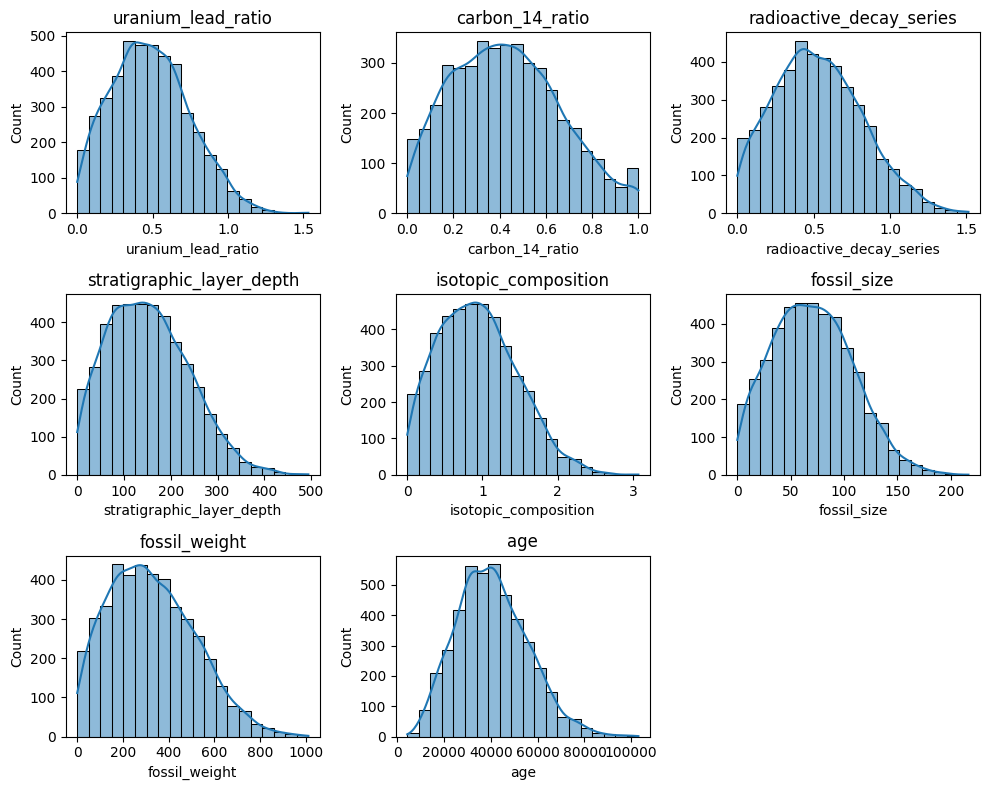

In [9]:
num_col = ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size', 'fossil_weight', 'age']

plt.figure(figsize=(10, 8))
for i, column in enumerate(data[num_col].columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[column], kde=True, bins=20, edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()

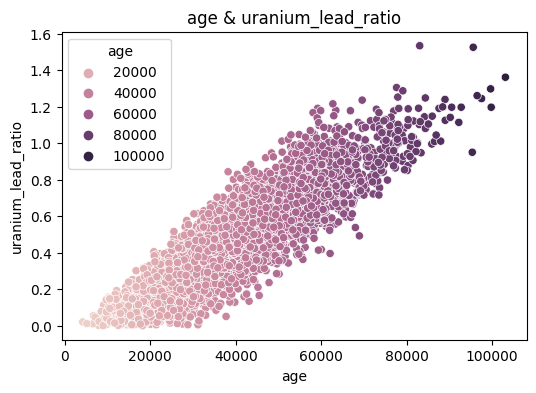

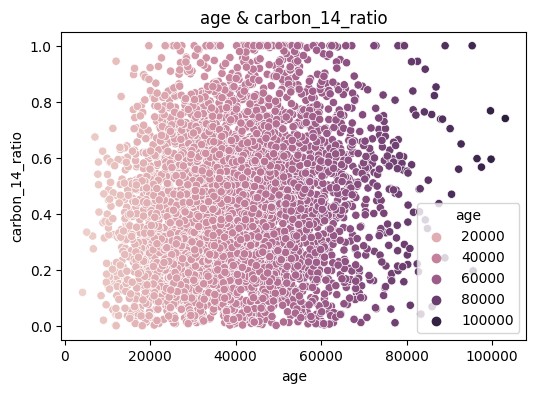

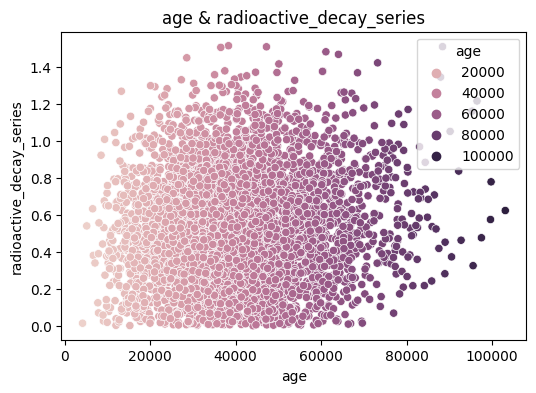

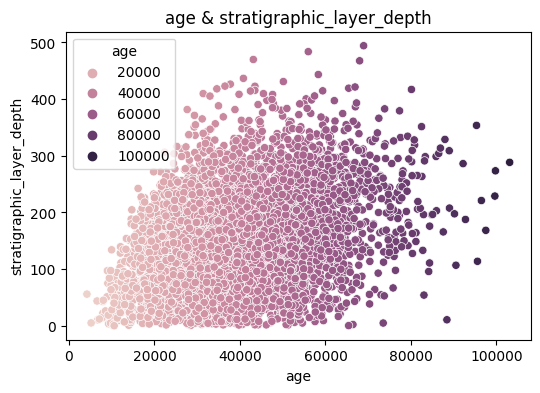

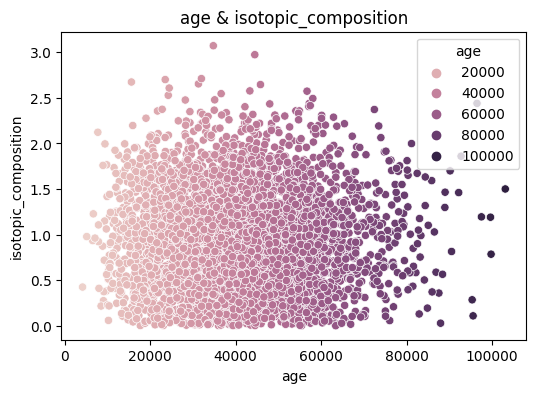

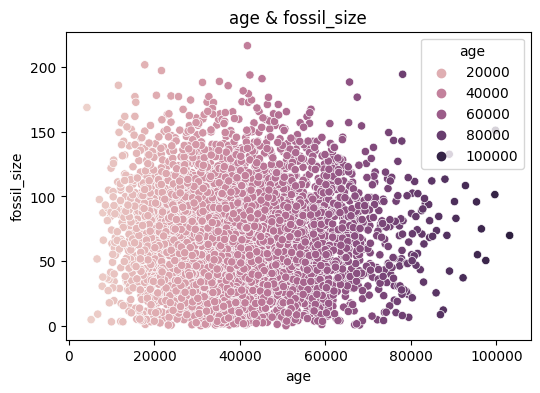

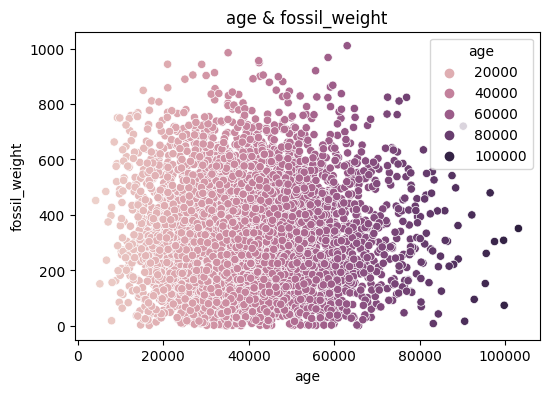

In [10]:
num_col2 = ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size', 'fossil_weight']

for col in num_col2:
    plt.figure(figsize=(6, 4))
    plt.title(f'age & {col}')
    sns.scatterplot(data=data, x='age', y=col, hue='age')
    plt.show()

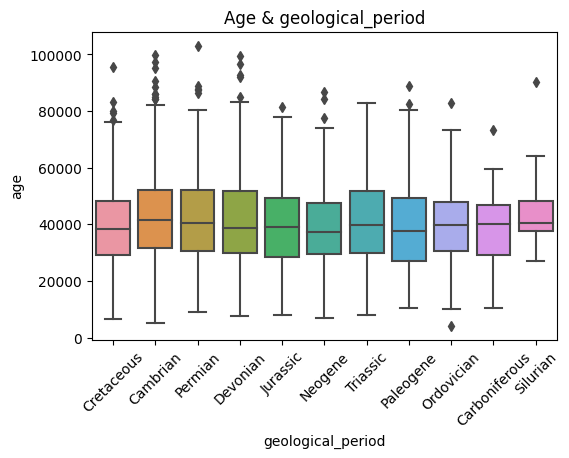

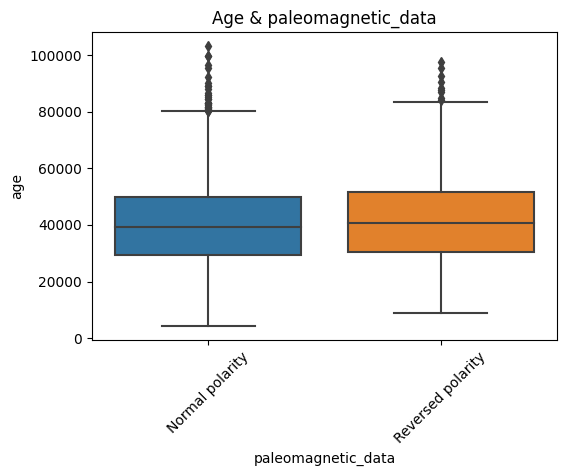

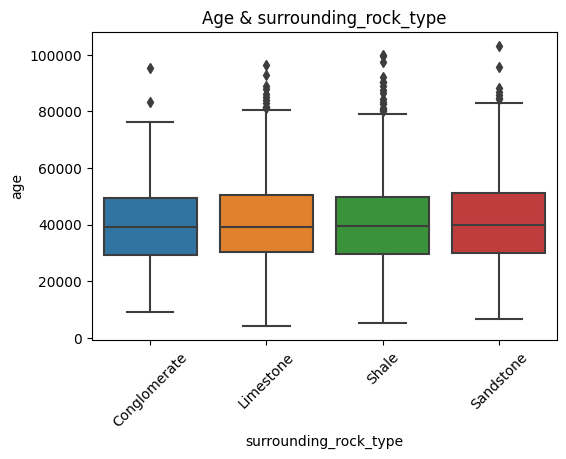

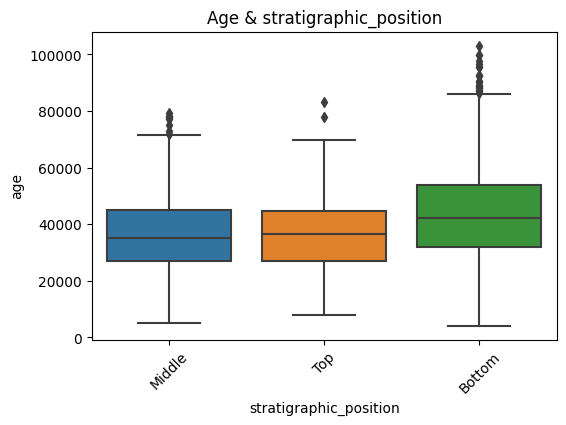

In [11]:
for col in Categorical_col:
    plt.figure(figsize=(6, 4))
    plt.title(f'Age & {col}')
    sns.boxplot(data=data, x=col, y='age')
    plt.xticks(rotation=45)
    plt.show()

<b>Data Preprocessing</b>

In [12]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['age'] < lower_bound) | (data['age'] > upper_bound)
data = data[~outliers]

In [13]:
from sklearn.preprocessing import StandardScaler

data = data.copy()

norm = StandardScaler()
for kolom in data[Numerical_col]:
    data[kolom] = norm.fit_transform(data[[kolom]])

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for kolom in data[Categorical_col]:
    data[kolom] = encoder.fit_transform(data[kolom])

In [15]:
data['inclusion_of_other_fossils'] = encoder.fit_transform(data['inclusion_of_other_fossils'])

In [16]:
data.corr()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
uranium_lead_ratio,1.000000,0.000492,0.004578,-0.025919,0.029608,-0.004123,-0.012679,-0.006812,-0.002340,0.027677,-0.037518,0.006537,0.877344
carbon_14_ratio,0.000492,1.000000,-0.007544,0.011758,-0.026702,-0.040763,0.005941,-0.003437,-0.024802,0.017830,-0.018484,-0.001595,0.124829
radioactive_decay_series,0.004578,-0.007544,1.000000,-0.003741,-0.015881,0.009862,-0.014778,0.009815,0.013546,-0.009566,0.009729,-0.008841,0.096867
stratigraphic_layer_depth,-0.025919,0.011758,-0.003741,1.000000,0.018830,-0.002067,0.021357,0.021063,-0.019121,0.002373,0.001886,-0.008110,0.330629
geological_period,0.029608,-0.026702,-0.015881,0.018830,1.000000,-0.029515,0.000024,0.012090,0.006220,-0.015368,-0.012137,0.021824,-0.015321
paleomagnetic_data,-0.004123,-0.040763,0.009862,-0.002067,-0.029515,1.000000,0.024582,-0.004122,-0.011707,-0.008210,0.012898,0.006450,0.047244
inclusion_of_other_fossils,-0.012679,0.005941,-0.014778,0.021357,0.000024,0.024582,1.000000,0.014946,-0.015695,0.005198,-0.021708,0.002820,-0.005890
isotopic_composition,-0.006812,-0.003437,0.009815,0.021063,0.012090,-0.004122,0.014946,1.000000,-0.015957,-0.000662,-0.018849,-0.033588,0.002357
surrounding_rock_type,-0.002340,-0.024802,0.013546,-0.019121,0.006220,-0.011707,-0.015695,-0.015957,1.000000,0.015558,0.003288,-0.006178,0.004135
stratigraphic_position,0.027677,0.017830,-0.009566,0.002373,-0.015368,-0.008210,0.005198,-0.000662,0.015558,1.000000,-0.011990,-0.016931,-0.190008


In [17]:
X = data.drop(['age'], axis=1)
y = data['age']

X.shape, y.shape

((4365, 12), (4365,))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b>Modelling (Linear Regression)</b>

In [19]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_ln = linear_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_linear = mean_squared_error(y_test, y_pred_ln)
r2_linear = r2_score(y_test, y_pred_ln)
mae_linear = mean_absolute_error(y_test, y_pred_ln)

print("Linear Regression Model")
print("Mean Absolute Error:", mae_linear)
print("Mean Squared Error:", mse_linear)
print("R^2 Score:", r2_linear)

Linear Regression Model
Mean Absolute Error: 0.13327967953811357
Mean Squared Error: 0.027892626073459305
R^2 Score: 0.969660197206607


<b>Modelling (RandomForest)</b>

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred_rf = rf.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model")
print('Mean Absolute Error:', mae_rf)
print("Mean Squared Error:", mse_linear)
print("R^2 Score:", r2_linear)

Random Forest Regression Model
Mean Absolute Error: 0.13356864663482046
Mean Squared Error: 0.027892626073459305
R^2 Score: 0.969660197206607


<b>Modelling (XGBoost)</b>

In [25]:
import xgboost as xgb

xb = xgb.XGBRegressor(objective='reg:squarederror')
xb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred_xb = xb.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_xb = mean_squared_error(y_test, y_pred_xb)
r2_xb = r2_score(y_test, y_pred_xb)
mae_xb = mean_absolute_error(y_test, y_pred_xb)

print("Linear Regression Model")
print("Mean Absolute Error:", mae_xb)
print("Mean Squared Error:", mse_xb)
print("R^2 Score:", r2_xb)

Linear Regression Model
Mean Absolute Error: 0.09844213789717393
Mean Squared Error: 0.015258341868771133
R^2 Score: 0.983402958113966
